In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, plot_precision_recall_curve, make_scorer, recall_score, brier_score_loss, precision_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# libraries for cleaning
import re
import nltk
nltk.download("stopwords") # helps us get rid of stop words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/UBDC_2021/Final/for_tobi_sentiment.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221461 entries, 0 to 221460
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  221461 non-null  int64  
 1   text                        221461 non-null  object 
 2   label                       221461 non-null  int64  
 3   raw_sentiment               221461 non-null  float64
 4   sentiment                   221461 non-null  int64  
 5   probability                 221461 non-null  float64
 6   created_at                  221461 non-null  object 
 7   hashtags                    40892 non-null   object 
 8   media                       33124 non-null   object 
 9   urls                        104470 non-null  object 
 10  favorite_count              221461 non-null  int64  
 11  id                          221461 non-null  int64  
 12  in_reply_to_screen_name     107089 non-null  object 
 13  in_reply_to_st

In [4]:
# !pip install textnets
from textnets import Corpus, Textnet

In [8]:
# !spacy download en_core_web_sm

2021-07-04 13:10:56.221940: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 13.7MB 25.2MB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
# !spacy validate

2021-07-04 13:11:20.648716: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.0.6) =================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.0.0,<3.1.0   3.0.0   ✔



In [ ]:
# !pip install cffi

# Network Analysis

In [76]:
# select the data labelled false
dfpos = df.label == 1
dfpos10 = df.loc[dfpos,:].reset_index(drop=True)
dfpos10 = dfpos10.loc[:20,:]
# select the data labelled true
dfneg = df.label == 0
dfneg10 = df.loc[dfneg,:].reset_index(drop=True)
dfneg10 = dfneg10.loc[:20,:]
df2 = pd.concat([dfpos10, dfneg10], axis = 0)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 20
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  42 non-null     int64  
 1   text                        42 non-null     object 
 2   label                       42 non-null     int64  
 3   raw_sentiment               42 non-null     float64
 4   sentiment                   42 non-null     int64  
 5   probability                 42 non-null     float64
 6   created_at                  42 non-null     object 
 7   hashtags                    2 non-null      object 
 8   media                       7 non-null      object 
 9   urls                        40 non-null     object 
 10  favorite_count              42 non-null     int64  
 11  id                          42 non-null     int64  
 12  in_reply_to_screen_name     1 non-null      object 
 13  in_reply_to_status_id       1 non-nul

In [78]:
df2 = df2.loc[:,["text","label"]]
#df1, df2 = train_test_split(df2, test_size = 0.1, random_state = 0)
df2.set_index("label", inplace= True)

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42 non-null     object
dtypes: object(1)
memory usage: 672.0+ bytes


In [80]:
df2.head()

,text
label,
1,why big pharma fauci and bill gates want to ...
1,blue skies smiling at me ...
1,pentagon confirms coronavirus accidently got i...
1,people of color may be immune to the coronavir...
1,[news] pentagon confirms coronavirus accidentl...


In [81]:
for_graphing = Corpus.from_df(df2)

In [14]:
# !pip install numexpr==2.6.1
# import numexpr

In [82]:
textn = Textnet(for_graphing.tokenized(stem = False), min_docs=1)

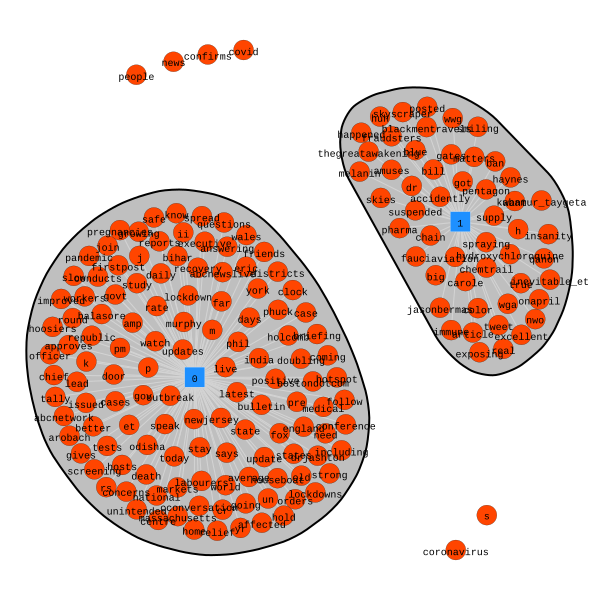

In [107]:
textn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=True)

In [130]:
figureee = textn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=True)
figureee.save("/content/drive/MyDrive/UBDC_2021/Final/seperability.png")

In [112]:
print(terms.top_betweenness())
print(terms.top_cluster_nodes())
print(terms.top_ev())
terms.eigenvector_centrality

abcnetwork    0.0
rate          0.0
odisha        0.0
officer       0.0
old           0.0
onapril       0.0
orders        0.0
outbreak      0.0
p             0.0
pandemic      0.0
dtype: float64
cluster
0    outbreak, updates, live, p, latest, new, watch...
1    accidently, chain, chemtrail, got, pentagon, s...
2                                             confirms
3                                          coronavirus
4                                                covid
5                                                 news
6                                               people
7                                                    s
Name: nodes, dtype: object
outbreak    1.000000
live        0.991424
updates     0.991424
p           0.868069
latest      0.849083
new         0.849083
watch       0.827788
m           0.803559
gov         0.803559
murphy      0.775477
dtype: float64


# Dealing with Sentiment

In [132]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=0)

cv = CountVectorizer(stop_words=stopwords.words("english"))
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)
feature_names = cv.get_feature_names()

In [133]:
# sum the words to see how many times words appear
summation = X_train.sum(axis = 0)
print(summation)

[[20  6  1 ...  1  4  1]]


In [134]:
# get word frequency 
word_frequency = []
for word, index in cv.vocabulary_.items():
  word_frequency.append((word, summation[0,index]))

In [135]:
# now sort it in ascending order
word_frequency_sorted = sorted(word_frequency, key = lambda y:y[1], reverse = True)
# let's examine the top 20 words that appear 
word_frequency_sorted[:20]

[('covid', 54292),
 ('coronavirus', 24359),
 ('people', 17695),
 ('amp', 12561),
 ('health', 11933),
 ('new', 9644),
 ('get', 8759),
 ('via', 8393),
 ('like', 8045),
 ('testing', 8029),
 ('us', 7891),
 ('cases', 7565),
 ('one', 7402),
 ('home', 7328),
 ('need', 7180),
 ('help', 7170),
 ('know', 7082),
 ('virus', 6750),
 ('may', 6400),
 ('cdc', 6070)]

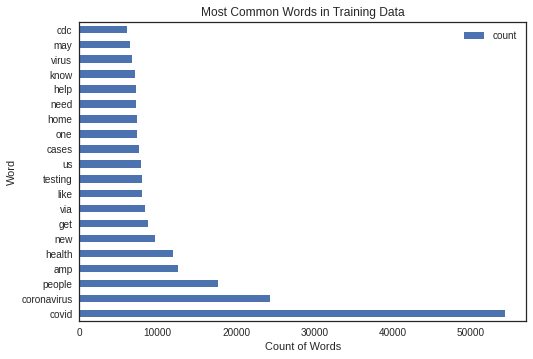

In [151]:
sample_words = pd.DataFrame(word_frequency_sorted[:20], columns=["word", "count"])
sample_words.set_index("word", inplace = True)
plt.style.use("seaborn-notebook")
sample_words.plot(kind = "barh")
plt.xlabel("Count of Words")
plt.ylabel("Word")
plt.title("Most Common Words in Training Data")
plt.savefig("/content/drive/MyDrive/UBDC_2021/Final/commonwords.pdf", bbox_inches = "tight")

In [152]:
df3 = df.loc[:,["raw_sentiment", "label"]]
df3.head()

,raw_sentiment,label
0,-0.0772,0
1,0.0000,0
2,0.0000,0
3,0.0000,0
4,0.4767,0


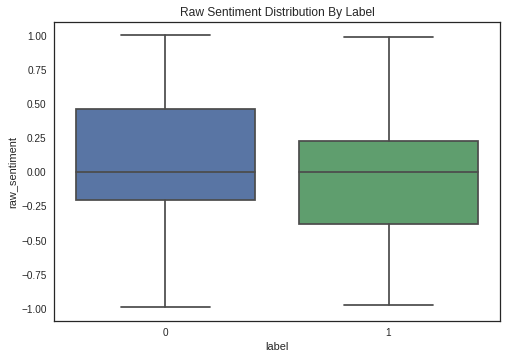

In [163]:
ax = sns.boxplot(x="label", y="raw_sentiment", data=df)
plt.title("Raw Sentiment Distribution By Label")
plt.savefig("/content/drive/MyDrive/UBDC_2021/Final/rawsentimentlabel.pdf", bbox_inches = "tight")